# The weighted dependence measures (`wdm`) API

This notebook demonstrates how to compute various dependence measures using the `wdm` function in pyvinecopulib, both with and without observation weights.

## Available Dependence Measures

The `wdm` function supports several dependence measures:
- **Pearson correlation** (`"pearson"`, `"prho"`, `"cor"`)
- **Spearman's ρ** (`"spearman"`, `"srho"`, `"rho"`)
- **Kendall's τ** (`"kendall"`, `"ktau"`, `"tau"`)
- **Blomqvist's β** (`"blomqvist"`, `"bbeta"`, `"beta"`)
- **Hoeffding's D** (`"hoeffding"`, `"hoeffd"`, `"d"`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvinecopulib as pv

# Set random seed for reproducibility
np.random.seed(42)

## 1. Basic Usage: Unweighted Dependence Measures

Let's start with some example data and compute various dependence measures.

In [2]:
# Generate correlated data
n = 200
x = np.random.normal(0, 1, n)
y = 0.7 * x + np.random.normal(0, 0.5, n)

# Compute various dependence measures
measures = {
  "Pearson": pv.wdm(x, y, "pearson"),
  "Spearman": pv.wdm(x, y, "spearman"),
  "Kendall": pv.wdm(x, y, "kendall"),
  "Blomqvist": pv.wdm(x, y, "blomqvist"),
  "Hoeffding": pv.wdm(x, y, "hoeffding"),
}

print("Unweighted Dependence Measures:")
print("=" * 35)
for name, value in measures.items():
  print(f"{name:12}: {value:.4f}")

Unweighted Dependence Measures:
Pearson     : 0.8180
Spearman    : 0.8057
Kendall     : 0.6097
Blomqvist   : 0.6000
Hoeffding   : 0.2696


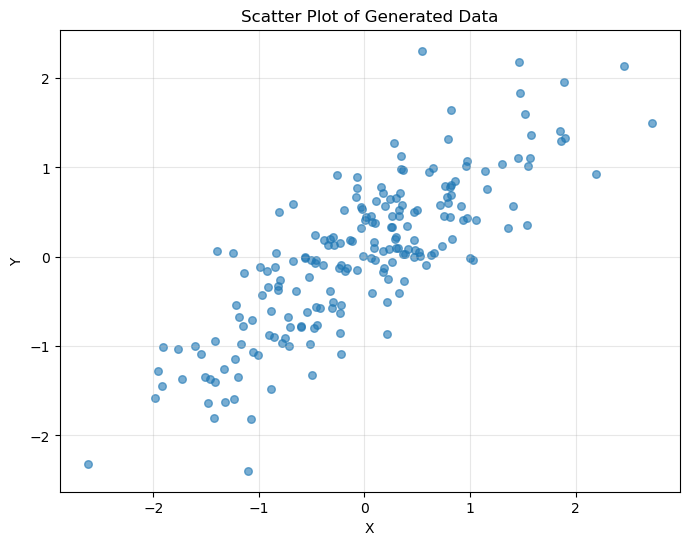

In [3]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, s=30)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of Generated Data")
plt.grid(True, alpha=0.3)
plt.show()

## 2. Weighted Dependence Measures

Now let's explore how weights affect the dependence measures. We'll use different weighting schemes to demonstrate the functionality.

In [4]:
# Example 1: Uniform weights (should give same result as unweighted)
weights_uniform = np.ones(n)

print("Uniform Weights vs Unweighted:")
print("=" * 35)
for method in ["pearson", "spearman", "kendall"]:
  unweighted = pv.wdm(x, y, method)
  weighted = pv.wdm(x, y, method, weights_uniform)
  print(f"{method.capitalize():12}: {unweighted:.6f} vs {weighted:.6f}")

Uniform Weights vs Unweighted:
Pearson     : 0.818019 vs 0.818019
Spearman    : 0.805694 vs 0.805694
Kendall     : 0.609749 vs 0.609749


In [5]:
# Example 2: Linear weights (more weight on later observations)
weights_linear = np.linspace(0.1, 2.0, n)

print("\nLinear Weights (0.1 to 2.0):")
print("=" * 35)
for method in ["pearson", "spearman", "kendall"]:
  unweighted = pv.wdm(x, y, method)
  weighted = pv.wdm(x, y, method, weights_linear)
  print(f"{method.capitalize():12}: {unweighted:.4f} -> {weighted:.4f}")


Linear Weights (0.1 to 2.0):
Pearson     : 0.8180 -> 0.8138
Spearman    : 0.8057 -> 0.7929
Kendall     : 0.6097 -> 0.5965


In [6]:
# Example 3: Half-zero weights (focus on second half of data)
weights_half_zero = np.zeros(n)
weights_half_zero[n // 2 :] = 1.0

print("\nHalf-Zero Weights (second half only):")
print("=" * 45)
for method in ["pearson", "spearman", "kendall"]:
  weighted_result = pv.wdm(x, y, method, weights_half_zero)
  second_half_result = pv.wdm(x[n // 2 :], y[n // 2 :], method)
  print(
    f"{method.capitalize():12}: {weighted_result:.6f} (weighted) vs {second_half_result:.6f} (second half)"
  )
  print(
    f"              Difference: {abs(weighted_result - second_half_result):.2e}"
  )


Half-Zero Weights (second half only):
Pearson     : 0.830812 (weighted) vs 0.830812 (second half)
              Difference: 0.00e+00
Spearman    : 0.809241 (weighted) vs 0.809241 (second half)
              Difference: 0.00e+00
Kendall     : 0.615354 (weighted) vs 0.615354 (second half)
              Difference: 0.00e+00


## 3. Comparison of Dependence Measures

Let's compare how different dependence measures behave with various types of relationships.

In [7]:
# Generate different types of relationships
n_comp = 150
x_base = np.random.uniform(-2, 2, n_comp)

relationships = {
  "Linear": 2 * x_base + np.random.normal(0, 0.5, n_comp),
  "Quadratic": x_base**2 + np.random.normal(0, 0.5, n_comp),
  "Exponential": np.exp(x_base / 2) + np.random.normal(0, 0.5, n_comp),
  "Sine": np.sin(2 * x_base) + np.random.normal(0, 0.3, n_comp),
}

print("Dependence Measures for Different Relationships:")
print("=" * 55)
print(
  f"{'Relationship':<12} {'Pearson':<8} {'Spearman':<8} {'Kendall':<8} {'Hoeffding':<10}"
)
print("-" * 55)

for name, y_rel in relationships.items():
  pearson = pv.wdm(x_base, y_rel, "pearson")
  spearman = pv.wdm(x_base, y_rel, "spearman")
  kendall = pv.wdm(x_base, y_rel, "kendall")
  hoeffding = pv.wdm(x_base, y_rel, "hoeffding")

  print(
    f"{name:<12} {pearson:<8.3f} {spearman:<8.3f} {kendall:<8.3f} {hoeffding:<10.6f}"
  )

Dependence Measures for Different Relationships:
Relationship Pearson  Spearman Kendall  Hoeffding 
-------------------------------------------------------
Linear       0.975    0.973    0.860    0.687903  
Quadratic    -0.046   -0.149   -0.118   0.125984  
Exponential  0.780    0.743    0.558    0.232443  
Sine         0.268    0.263    0.157    0.085145  


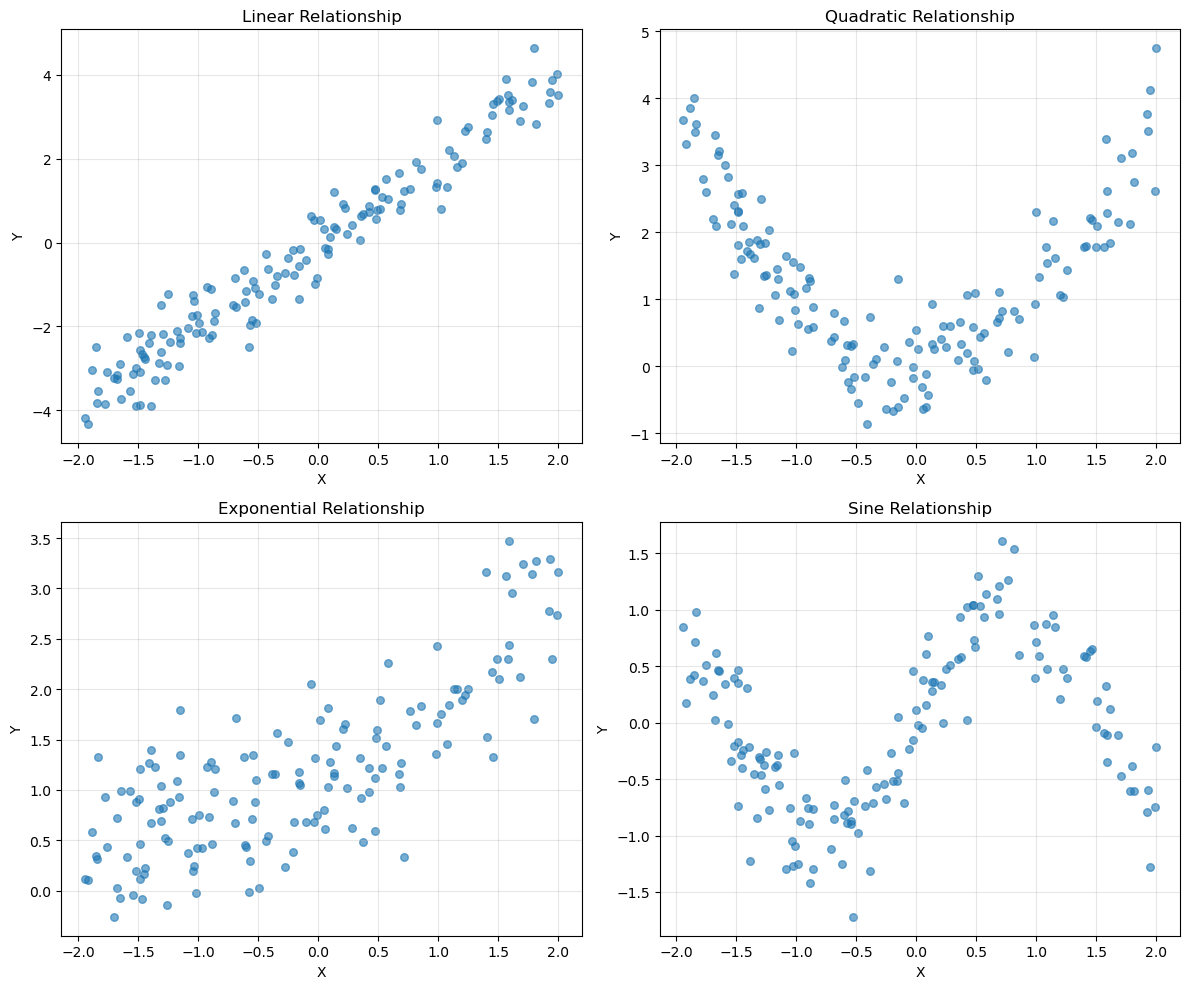

In [8]:
# Visualize the different relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, y_rel) in enumerate(relationships.items()):
  axes[i].scatter(x_base, y_rel, alpha=0.6, s=30)
  axes[i].set_xlabel("X")
  axes[i].set_ylabel("Y")
  axes[i].set_title(f"{name} Relationship")
  axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()